In [1]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import category_encoders as ce
from tqdm import tqdm
from darts import TimeSeries

In [2]:
# calculate the smape
def compute_smape(y_true, y_pred):

    if not (isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray)):
        y_true, y_pred = np.array(y_true), np.array(y_pred)

    return round(np.mean(
        np.abs(y_pred - y_true) /
        ((np.abs(y_pred) + np.abs(y_true))/2)
    )*100, 3)


In [3]:
train_data = pd.read_csv('../../data/godaddy-microbusiness-density-forecasting/train_with_census.csv')
train_data.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019-01-01,80.6,16.1,2.3,0.7,58731.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019-01-01,80.6,16.1,2.3,0.7,58731.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019-01-01,80.6,16.1,2.3,0.7,58731.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019-01-01,80.6,16.1,2.3,0.7,58731.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019-01-01,80.6,16.1,2.3,0.7,58731.0


In [4]:
# convert first_day_of_month to datetime
train_data['first_day_of_month'] = pd.to_datetime(train_data['first_day_of_month'])

In [5]:
cfip = train_data['cfips'].sample()

df_cfip = train_data[train_data['cfips'] == cfip.values[0]]

In [6]:
# create a time series for the df
series = TimeSeries.from_dataframe(df_cfip, 'first_day_of_month', 'microbusiness_density')

In [7]:
train, val = series[:-6], series[-6:]

In [8]:
from darts.models import ExponentialSmoothing, ARIMA,AutoARIMA, BATS, Theta, Prophet, FFT,KalmanForecaster, RegressionModel, RandomForest

model = RandomForest(lags=[-1, -2, -3])
model.fit(train)
prediction = model.predict(len(val), num_samples=1)

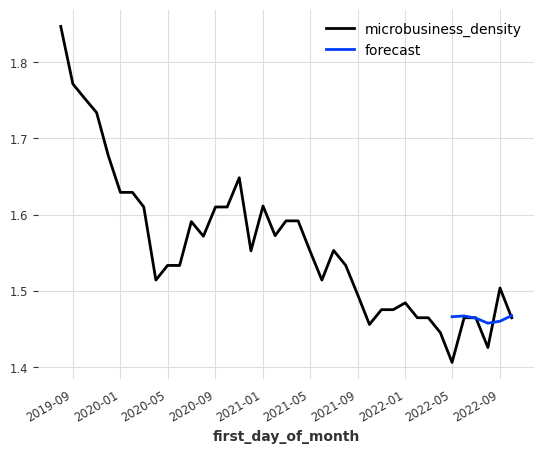

In [9]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [10]:
all_smapes = []

for cfip in tqdm(train_data['cfips'].unique()):
    df_cfip = train_data[train_data['cfips'] == cfip]
    series = TimeSeries.from_dataframe(df_cfip, 'first_day_of_month', 'microbusiness_density')
    train, val = series[:-6], series[-6:]
    model = RandomForest(lags=[-1, -2, -3])
    model.fit(train)
    prediction = model.predict(len(val), num_samples=1)
    smape = compute_smape(val.all_values().flatten(), prediction.mean().all_values().flatten())
    all_smapes.append(smape)

 45%|████▌     | 1426/3135 [10:13<12:16,  2.32it/s]C:\Users\avomo\AppData\Local\Temp\ipykernel_10376\4041025148.py:8: RuntimeWarning: invalid value encountered in true_divide
  np.abs(y_pred - y_true) /
 82%|████████▏ | 2574/3135 [18:17<03:59,  2.34it/s]


KeyboardInterrupt: 

In [134]:
x = np.array(all_smapes)
np.mean(x[~np.isnan(x)])

3.6039706445437143

### Train the model for every cfip

In [137]:
from darts.models import NaiveSeasonal, RegressionModel

In [146]:
df_cfip

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019-01-01,80.6,16.1,2.3,0.7,58731.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019-01-01,80.6,16.1,2.3,0.7,58731.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019-01-01,80.6,16.1,2.3,0.7,58731.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019-01-01,80.6,16.1,2.3,0.7,58731.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019-01-01,80.6,16.1,2.3,0.7,58731.0
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242,2020-01-01,82.7,16.7,2.3,0.6,57982.0
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217,2020-01-01,82.7,16.7,2.3,0.6,57982.0
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227,2020-01-01,82.7,16.7,2.3,0.6,57982.0
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255,2020-01-01,82.7,16.7,2.3,0.6,57982.0
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257,2020-01-01,82.7,16.7,2.3,0.6,57982.0


In [147]:
# Build a list train and val for each cfip
train_list = []
val_list = []
for cfip in tqdm(train_data['cfips'].unique()):
    df_cfip = train_data[train_data['cfips'] == cfip]
    val_series = TimeSeries.from_dataframe(df_cfip, 'first_day_of_month', 'microbusiness_density')
    past_covariate_series = TimeSeries.from_dataframe(df_cfip, 'first_day_of_month', ['cfips', 'pct_bb', 'pct_college', 'pct_foreign_born', 'pct_it_workers', 'median_hh_inc'])
    train, val = series[:-6], series[-6:]
    train_covariate, val_covariate = past_covariate_series[:-6], past_covariate_series[-6:]
    train_list.append({'value' : train, 'covariate' : train_covariate})
    val_list.append({'value' : val, 'covariate' : val_covariate})


100%|██████████| 3135/3135 [00:39<00:00, 79.84it/s]


In [156]:
# for each cfip, train the model and predict the next 6 months

model = RandomForest(lags_past_covariates=[-1])
all_predictions = []
for train, val in tqdm(zip(train_list, val_list)):
    model.fit(train['value'][1:], past_covariates= train['covariate'])
    prediction = model.predict(len(val['value']), past_covariates=val['covariate'], num_samples=1)
    all_predictions.append(prediction)

0it [00:00, ?it/s]ValueError: The corresponding past_covariate of the series at index 0 isn't sufficiently long. Given horizon `n=6`, `min(lags_past_covariates)=-1`, `max(lags_past_covariates)=-1` and `output_chunk_length=1`, the past_covariate has to range from 2022-04-01 00:00:00 until 2022-09-01 00:00:00 (inclusive), but it ranges only from 2022-05-01 00:00:00 until 2022-10-01 00:00:00.
0it [00:00, ?it/s]


ValueError: The corresponding past_covariate of the series at index 0 isn't sufficiently long. Given horizon `n=6`, `min(lags_past_covariates)=-1`, `max(lags_past_covariates)=-1` and `output_chunk_length=1`, the past_covariate has to range from 2022-04-01 00:00:00 until 2022-09-01 00:00:00 (inclusive), but it ranges only from 2022-05-01 00:00:00 until 2022-10-01 00:00:00.

In [143]:
# compute the smape for each cfip
all_smapes = []
for prediction, val in tqdm(zip(all_predictions, val_list)):
    smape = compute_smape(val.all_values().flatten(), prediction.mean().all_values().flatten())
    all_smapes.append(smape)

1355it [00:01, 830.99it/s]C:\Users\avomo\AppData\Local\Temp\ipykernel_4076\4041025148.py:8: RuntimeWarning: invalid value encountered in true_divide
  np.abs(y_pred - y_true) /
3135it [00:03, 808.20it/s]


### Global training

In [4]:
from darts.models import LinearRegressionModel, RandomForest, LightGBMModel, NBEATSModel,RNNModel
from darts.utils.losses import SmapeLoss

In [5]:
# create a sequence of series for each cfip
train_list = []
val_list = []
for cfip in tqdm(train_data['cfips'].unique()):
    df_cfip = train_data[train_data['cfips'] == cfip]
    series = TimeSeries.from_dataframe(df_cfip, 'first_day_of_month', 'microbusiness_density')
    train_list.append(series[:-6])
    val_list.append(series[-6:])

100%|██████████| 3135/3135 [00:17<00:00, 178.58it/s]


In [6]:
model = RNNModel(input_chunk_length=6, model='RNN',
                 hidden_dim = 8,n_rnn_layers=1,training_length=12,
                 loss_fn=SmapeLoss(), n_epochs=10, random_state=77,
                    pl_trainer_kwargs={
                    "accelerator": "gpu",
                    "devices": [0]
                    }
                )

model.fit(train_list)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | SmapeLoss        | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 88    
4 | V             | Linear           | 9     
---------------------------------------------------
97        Trainable params
0         Non-trainable params
97        Total params
0.001     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

C:\Users\avomo\AppData\Roaming\Python\Python39\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
# evaluate the model on the validation set
prediction = [model.predict(len(val_list[0]), series=train_list[s]) for s in range(len(train_list))]

In [63]:
all_smapes = []
for prediction, val in tqdm(zip(prediction, val_list)):
    smape = compute_smape(val.all_values().flatten(), prediction.mean().all_values().flatten())
    all_smapes.append(smape)

np.mean(all_smapes)


0it [00:00, ?it/s]
97it [00:00, 886.89it/s]
196it [00:00, 898.89it/s]
286it [00:00, 887.89it/s]
375it [00:00, 843.53it/s]
471it [00:00, 843.15it/s]
556it [00:00, 812.50it/s]
638it [00:00, 798.07it/s]
723it [00:00, 811.81it/s]
811it [00:00, 830.44it/s]
895it [00:01, 826.67it/s]
978it [00:01, 821.26it/s]
1063it [00:01, 827.80it/s]
1152it [00:01, 845.91it/s]
1244it [00:01, 866.84it/s]
1340it [00:01, 891.41it/s]
1443it [00:01, 931.93it/s]
1542it [00:01, 946.83it/s]
1638it [00:01, 949.52it/s]
1733it [00:01, 944.02it/s]
1830it [00:02, 951.54it/s]
1927it [00:02, 955.42it/s]
2024it [00:02, 955.22it/s]
2130it [00:02, 959.63it/s]
2231it [00:02, 949.61it/s]
2326it [00:02, 924.61it/s]
2419it [00:02, 870.78it/s]
2511it [00:02, 854.30it/s]
2603it [00:02, 871.99it/s]
2694it [00:03, 873.41it/s]
2793it [00:03, 883.09it/s]
2882it [00:03, 880.48it/s]
2972it [00:03, 875.57it/s]
3135it [00:03, 878.27it/s]


31.835641467304626

In [64]:
x = np.array(all_smapes)
np.mean(x[~np.isnan(x)])

31.835641467304626